# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
'''
Declare global variables used for this project
'''

# Control if training should execute or only validation
train_network = 0
rate = 0.001
alpha = 0.001
EPOCHS = 15
BATCH_SIZE = 128

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../traffic-signs-data/train.p"
validation_file = "../traffic-signs-data/valid.p"
testing_file = "../traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
# Replace each question mark with the appropriate value.
# Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
# Data exploration visualization code goes here.
# Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
import random
import linecache
# Visualizations will be shown in the notebook.
%matplotlib inline

# Pick a random image from training set to display
index = random.randint(0, len(X_train))
sign_category = y_train[index]

# Get the name of the sign from the signnames file
sign_name = linecache.getline("signnames.csv", sign_category + 2)

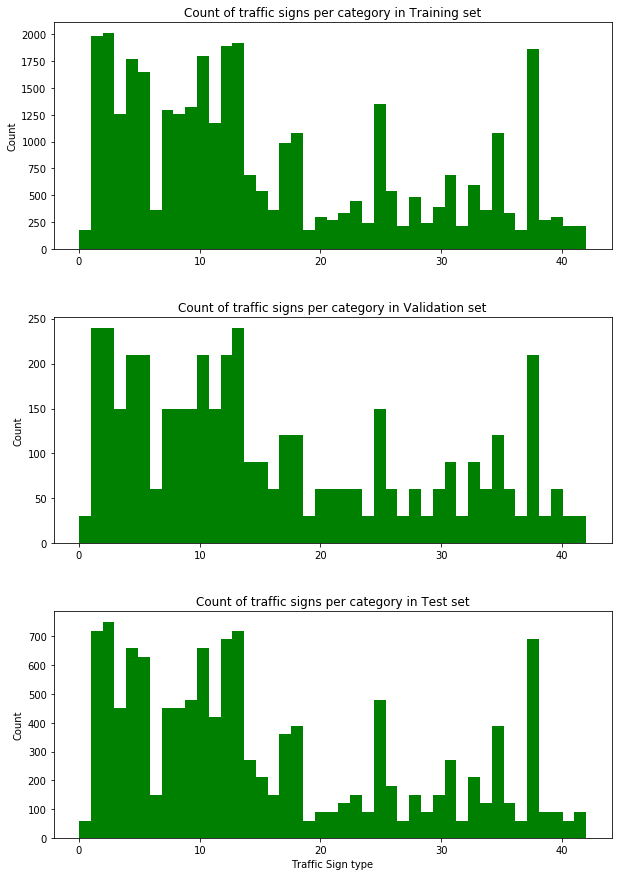

In [5]:
# Plot histogram to show count of signs per category in the training,
# validation and test set

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

# the histogram of the data
n, bins, patches = ax1.hist(y_train, bins=n_classes, normed=0, facecolor='g')
n, bins, patches = ax2.hist(y_valid, bins=n_classes, normed=0, facecolor='g')
n, bins, patches = ax3.hist(y_test, bins=n_classes, normed=0, facecolor='g')

ax1.set_ylabel('Count')
ax1.set_title(r'Count of traffic signs per category in Training set')

ax2.set_title(r'Count of traffic signs per category in Validation set')
ax2.set_ylabel('Count')

ax3.set_title(r'Count of traffic signs per category in Test set')
ax3.set_ylabel('Count')
ax3.set_xlabel('Traffic Sign type')

f.subplots_adjust(hspace=0.3)
plt.show()

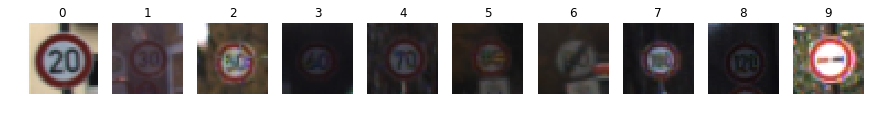

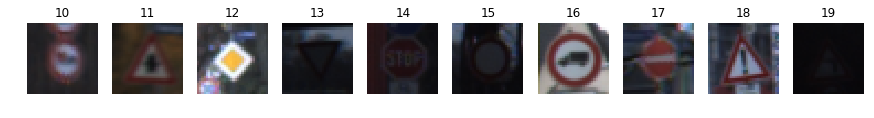

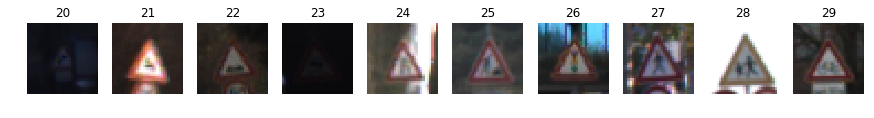

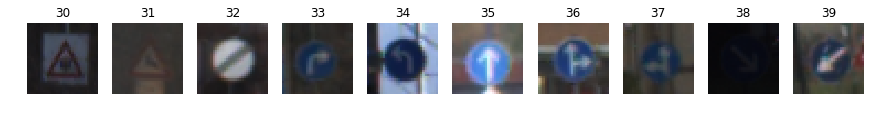

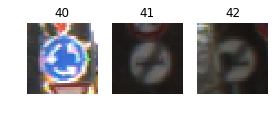

In [6]:
'''
Show a sample image for each category.
This helps to understand how the signs look and
provide clues for pre-processing
'''

fig = plt.figure(1, figsize=(15, 15))

i = 1
j = 1

sample_index = []

for n in range(n_classes):
    indx = np.where(y_train == n)[0][0]
    sample_index.append(indx)
    image = X_train[indx]
    plt.subplot(1, 10, i)
    plt.imshow(image)
    plt.axis('off')

    plt.title(n)
    if i == 10:
        i = 1
        j += 1
        fig = plt.figure(j, figsize=(15, 15))
    else:
        i += 1

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
# Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
# Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
import cv2


def pre_process_images(images):
    processed_images = []
    for image in images:

        '''
        Several images are very dark and have poor contrast
        Improve the contrast by applying a CLAHE transform
        '''
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(5, 5))
        image = clahe.apply(image)

        '''
        convert back to RGB Grayscale. We get back 3 channels, 
        however color information is lost
        '''
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

        # Normalize the image so that all pixels range between -1 to 1
        image = (image - 128.) / 128.

        processed_images.append(image)

    # return the modified image array that would be used for further processing
    return processed_images

In [8]:
# Pre Process the training samples
X_train = pre_process_images(X_train)

In [9]:
# Pre Process the Validation images
X_valid = pre_process_images(X_valid)

In [10]:
# Pre Process the Test images
X_test = pre_process_images(X_test)

Sample training images after Pre Processing


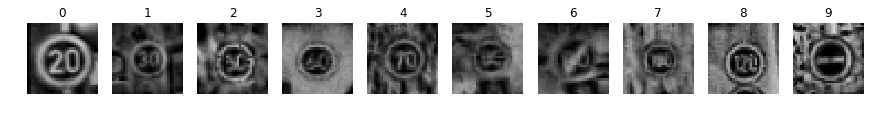

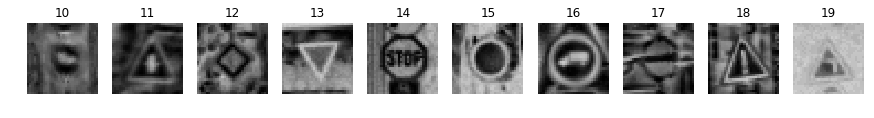

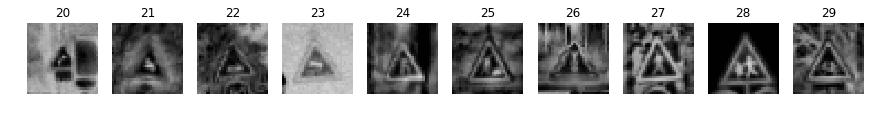

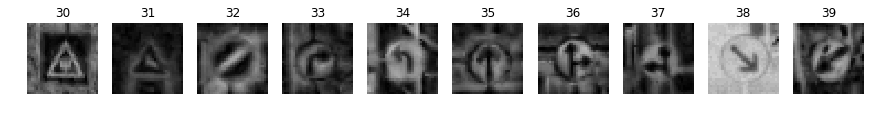

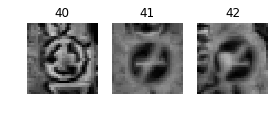

In [11]:
# Display a sample image for each class from the training set after pre
# processing

print("Sample training images after Pre Processing")

fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
i = 1
j = 1
cls = 0
for indx in sample_index:
    image = X_train[indx] * 128. + 128.
    plt.subplot(1, 10, i)
    plt.imshow(image)
    plt.axis('off')
    plt.title(cls)
    cls += 1

    if i == 10:
        i = 1
        j += 1
        fig = plt.figure(j, figsize=(15, 15))
    else:
        i += 1

In [12]:
'''
Helper functions that can be used for data augmentation
'''

# Random rotation of image between -10 to 10 degree


def random_rotation(image):
    rows, cols, chnls = image.shape
    M = cv2.getRotationMatrix2D(
        (cols / 2, rows / 2), random.randint(-10, 10), 1)
    dst = cv2.warpAffine(image, M, (cols, rows))
    return dst


# Add Noise
def add_gaussian_noise(image):
    rows, cols, chnls = image.shape
    mean = 0
    gauss = np.random.normal(mean, 1, (rows, cols, chnls))
    gauss = gauss.reshape(rows, cols, chnls)
    image = image + gauss
    return image

# Add Noise


def add_speckle(image):
    rows, cols, chnls = image.shape
    gauss = np.random.randn(rows, cols, chnls)
    gauss = gauss.reshape(rows, cols, chnls)
    image = image + image * gauss
    return image

In [13]:
'''
Data Augmentation of the training set. 
This is an important step to improve accuracy
Add different kinds of transformations to the images so that the
network sees a spectrum of images for the same sign

In the ideal world, images should be uniform and of good quality. 
However, in reality, we can have a large variation and distortions.

This step allows us to create a larger dataset without doing additional data collection
'''


def add_fake_data(images, labels):
    new_images = []
    new_labels = []
    height = 32
    width = 32

    '''
    Certain images are sensitive to the Left - Right orientation. We should not flip those
    without changing the label. Following classes are eligible for Left/Right Flip
    '''
    lr_flip_ok = [9, 11, 12, 13, 17, 18, 22,
                  23, 24, 26, 27, 29, 30, 35, 40, 41]

    '''
    Certain images are sensitive to the Top Down orientation. We should not flip those
    without changing the label. Following classes are eligible for Top / Down flip
    '''
    td_flip_ok = [9, 11, 12, 17, 40]

    signtype_count, signtype = np.unique(y_train, return_counts=True)

    for image, label in zip(images, labels):

        # We have a good representation for certain classes. Limiting the transformation to avoid
        # skewing the distribution further after augmentation
        if signtype_count[label] >= 1800:
            new_images.append(image)
            new_labels.append(label)
            break

        new_images.append(image)
        new_labels.append(label)

        if label in lr_flip_ok:
            # Vertical mirror
            img = cv2.flip(image, flipCode=1)
            new_images.append(img)
            new_labels.append(label)

            # Additional processing to increase images having low
            # representations
            if signtype_count[label] <= 500:
                img = add_speckle(img)
                new_images.append(img)
                new_labels.append(label)

                img = add_gaussian_noise(img)
                new_images.append(img)
                new_labels.append(label)

        if label in td_flip_ok:
            # Horizontal mirror
            img = cv2.flip(image, flipCode=0)
            new_images.append(img)
            new_labels.append(label)

            if signtype_count[label] <= 500:
                img = add_speckle(img)
                new_images.append(img)
                new_labels.append(label)

                img = add_gaussian_noise(img)
                new_images.append(img)
                new_labels.append(label)

        img = random_rotation(image)
        new_images.append(img)
        new_labels.append(label)

        if signtype_count[label] <= 1000:

            # Creating more images with various combinations of rotation, noise
            # etc
            img = random_rotation(image)
            new_images.append(img)
            new_labels.append(label)

            img = add_gaussian_noise(img)
            new_images.append(img)
            new_labels.append(label)

            img = add_gaussian_noise(image)
            new_images.append(img)
            new_labels.append(label)

            img = random_rotation(image)

            img = add_speckle(img)
            new_images.append(img)
            new_labels.append(label)

            img = add_speckle(image)
            new_images.append(img)
            new_labels.append(label)

            img = cv2.resize(image, (34, 34))
            img = img[0:32, 0:32]
            new_images.append(img)
            new_labels.append(label)

            dst = random_rotation(img)
            new_images.append(dst)
            new_labels.append(label)

            dst = add_speckle(img)
            new_images.append(dst)
            new_labels.append(label)

            dst = add_gaussian_noise(img)
            new_images.append(dst)
            new_labels.append(label)

            dst = random_rotation(img)
            new_images.append(dst)
            new_labels.append(label)

            dst = add_speckle(dst)
            new_images.append(dst)
            new_labels.append(label)

            dst = add_gaussian_noise(dst)
            new_images.append(dst)
            new_labels.append(label)

    return new_images, new_labels

In [14]:
'''
Augment training data only if we are intending to train the network
If doing only validation / test then save time by skipping the following steps
'''

if train_network:
    X_train, y_train = add_fake_data(X_train, y_train)
    print("Augmented data size = ", len(X_train))

    f, ax = plt.subplots(figsize=(10, 5))

    # the histogram of the data
    n, bins, patches = ax.hist(
        y_train, bins=n_classes, normed=0, facecolor='g')
    ax.set_title('Count of traffic signs per category in Training set')
    ax.set_ylabel('Count')
    ax.set_xlabel('Traffic Sign distribution after image augmentation')

    plt.show()

In [15]:
'''
We could do additional enhancement to each bath in every Epoch while training
Currently disabled this code as it increases training time significantly
with small increase in accuracy.
However, it would be a good idea to use this function and increase Epochs to
allow the network to generalize better
'''


def distort_image(image):
    rand = random.randint(0, 10)

    if (rand >= 8):
        image = tf.image.random_brightness(image, max_delta=100 / 255.0)
        image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
        image = tf.image.central_crop(image, 0.9)
        image = tf.image.resize_images(image, [32, 32])

    elif rand >= 6:
        image = tf.image.central_crop(image, 0.8)
        image = tf.image.resize_images(image, [32, 32])

    elif rand >= 4:
        image = tf.image.random_brightness(image, max_delta=50 / 255.0)

    elif rand >= 2:
        image = tf.image.central_crop(image, 0.9)
        image = tf.image.resize_images(image, [32, 32])

    elif rand >= 0:
        image = tf.image.central_crop(image, 0.85)
        image = tf.image.resize_images(image, [32, 32])

    image = tf.image.per_image_standardization(image)
    return image

# Normalize the test or validation images. Unused


def normalize_batch(images):
    images = tf.map_fn(
        lambda img: tf.image.per_image_standardization(img), images)
    return images

# Unused function


def augment_data(images):
    output_images = tf.map_fn(lambda img: distort_image(img), images)
    return output_images

### Model Architecture

In [16]:
# Define your architecture here.
# Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten


'''
Started with using LeNet architecture as the starting point as it works fairly well

'''


def LeNet(x, keep_prob):
    # Arguments used for tf.truncated_normal, randomly defines variables for
    # the weights and biases for each layer
    mu = 0
    sigma = 0.01

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x18.
    F_W1 = tf.Variable(tf.truncated_normal(
        [5, 5, 3, 18], mean=mu, stddev=sigma), name="weights_1")
    F_b1 = tf.Variable(tf.random_normal([18]), name="bias_1")
    padding = 'VALID'
    conv_1 = tf.nn.conv2d(
        x, F_W1, strides=[1, 1, 1, 1], padding=padding) + F_b1

    # Dropout before activation
    conv_1 = tf.nn.dropout(conv_1, keep_prob, name="dropout_1")

    # Activation.
    relu_1 = tf.nn.relu(conv_1, name="relu_1")

    # Layer 1A: Modified the LeNet by adding a convolution instead of pooling
    # Input = 28x28x18. Output = 14x14x18.
    F_W1a = tf.Variable(tf.truncated_normal(
        [5, 5, 18, 18], mean=mu, stddev=sigma), name="weights_1a")
    F_b1a = tf.Variable(tf.random_normal([18]), name="bias_1a")
    padding = 'SAME'
    conv_1a = tf.nn.conv2d(relu_1, F_W1a, strides=[
                           1, 2, 2, 1], padding=padding) + F_b1a

    # Activation.
    relu_1a = tf.nn.relu(conv_1a, name="relu_1a")

    # Layer 2
    # Input = 14x14x18 Output = 10x10x48
    F_W2 = tf.Variable(tf.truncated_normal(
        [5, 5, 18, 48], mean=mu, stddev=sigma), name="weights_2")
    F_b2 = tf.Variable(tf.random_normal([48]), name="bias_2")
    padding = 'VALID'
    conv_2 = tf.nn.conv2d(relu_1a, F_W2, strides=[
                          1, 1, 1, 1], padding=padding) + F_b2

    # Activation.
    relu_2 = tf.nn.relu(conv_2, name="relu_2")

    # Pooling. Input = 10x10x48. Output = 5x5x48.
    pool_2 = tf.nn.max_pool(relu_2, ksize=[1, 2, 2, 1], strides=[
                            1, 2, 2, 1], padding=padding)

    # Flatten. Input = 5x5x48. Output = 1200.
    flt_2 = flatten(pool_2)

    # Layer 3: Fully Connected. Input = 1200. Output = 360.
    F_W3 = tf.Variable(tf.truncated_normal(
        [1200, 360], mean=mu, stddev=sigma), name="weights_3")
    F_b3 = tf.Variable(tf.random_normal([360]), name="bias_3")
    fc_3 = tf.add(tf.matmul(flt_2, F_W3), F_b3)

    fc_3 = tf.nn.dropout(fc_3, keep_prob)

    # Activation.
    relu_3 = tf.nn.relu(fc_3, name="relu_3")

    # Layer 4: Fully Connected. Input = 360. Output = 252.
    WC4 = tf.Variable(tf.truncated_normal(
        [360, 252], mean=mu, stddev=sigma), name="weights_4")
    b4 = tf.Variable(tf.random_normal([252]), name="bias_4")
    fc_4 = tf.add(tf.matmul(relu_3, WC4), b4)

    # Activation.
    relu_4 = tf.nn.relu(fc_4, name="relu_4")
    dropout_4 = tf.nn.dropout(relu_4, keep_prob, name="dropout_4")

    # Layer 5: Fully Connected. Input = 252. Output = 43.
    WC5 = tf.Variable(tf.truncated_normal(
        [252, n_classes], mean=mu, stddev=sigma), name="weights_5")
    b5 = tf.Variable(tf.random_normal([n_classes]), name="bias_5")
    logits = tf.add(tf.matmul(dropout_4, WC5), b5, name="logits")

    return logits

In [17]:
# Tensors to hold the images, labels etc
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

In [18]:
logits = LeNet(x, keep_prob)
saver = tf.train.Saver()

# Training Pipeline

In [19]:
modified_batch = augment_data(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=one_hot_y)

# Add L2 regularization to reduce overfitting
vars = tf.trainable_variables()
lossL2 = tf.add_n([tf.nn.l2_loss(v)
                   for v in vars if 'bias' not in v.name]) * alpha

loss_operation = tf.reduce_mean(cross_entropy + lossL2)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)

In [20]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
normalized_images = normalize_batch(x)

# Evaluation function to evaluate the accuracy for validation / test etc


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset +
                                  BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
        #batch_x = sess.run(normalized_images, feed_dict={x: batch_x})
        accuracy = sess.run(accuracy_operation, feed_dict={
                            x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [21]:
# Train your model here.
# Calculate and report the accuracy on the training and validation set.
# Once a final model architecture is selected,
# the accuracy on the test set should be calculated and reported as well.
# Feel free to use as many code cells as needed.

if train_network:
    with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)

            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]

                '''
                Good opportunity to process images here. This will enable the network to 
                see larger variations of data and hence generalize better
                
                Disabled for now 
                '''
                #batch_x = sess.run(modified_batch, feed_dict={x: batch_x})
                sess.run(training_operation, feed_dict={
                         x: batch_x, y: batch_y, keep_prob: 0.75})

            validation_accuracy = evaluate(X_valid, y_valid)
            print("EPOCH {} ...".format(i + 1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()

        saver.save(sess, './traffic_sign')
        print("Model saved")

In [22]:
# Test the accuracy with Test data
with tf.Session() as sess:
    # sess.run(tf.global_variables_initializer())
    saver.restore(sess, './traffic_sign')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()

Test Accuracy = 0.935



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

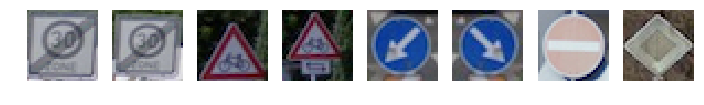

In [23]:
# Load the images and plot them here.
# Feel free to use as many code cells as needed.
import os
import imghdr
import matplotlib.image as mpimg
import csv


def is_jpg(filename):
    image_type = imghdr.what(filename)
    if not image_type:
        return False
    else:
        return True


images = []
expected_signs = []
basepath = "German_signs/"
fig = plt.figure(1, figsize=(15, 15))

i = 1

# Get the images and expected labels for the images we downloaded from the
# internet
with open('internet_images.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for line in reader:
        path = os.path.join(basepath, line[0])
        if is_jpg(path):
            image = mpimg.imread(path)

            plt.subplot(1, 10, i)
            plt.imshow(image)
            plt.axis('off')

            images.append(image.reshape(32, 32, 3))
            expected_signs.append(line[1])
            i += 1

### Predict the Sign Type for Each Image

In [24]:
# Run the predictions here and use the model to output the prediction for each image.
# Make sure to pre-process the images with the same pre-processing pipeline used earlier.
# Feel free to use as many code cells as needed.

images = pre_process_images(images)

test_predictions = tf.argmax(logits, 1)
print("Detected signs by the network")
print()

with tf.Session() as sess:
    saver.restore(sess, './traffic_sign')
    response = sess.run(test_predictions, feed_dict={
                        x: images, keep_prob: 1.0})
    for i in response:
        sign_name = linecache.getline("signnames.csv", i + 2)
        print("Sign detected {}".format(sign_name))
        #print("Sign detected {}        Expected sign{}".format(sign_name, expected_signs[i]))

Detected signs by the network

Sign detected 32,End of all speed and passing limits

Sign detected 40,Roundabout mandatory

Sign detected 22,Bumpy road

Sign detected 28,Children crossing

Sign detected 39,Keep left

Sign detected 38,Keep right

Sign detected 17,No entry

Sign detected 12,Priority road



### Analyze Performance

In [25]:
# Calculate the accuracy for these 5 new images.
# For example, if the model predicted 1 out of 5 signs correctly, it's 20%
# accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, './traffic_sign')
    internet_accuracy = evaluate(images, expected_signs)
    print("Accuracy of internet image detection = {:.2f}%".format(
        internet_accuracy * 100))

Accuracy of internet image detection = 62.50%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [26]:
# Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web.
# Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, './traffic_sign')
    predictions = tf.nn.softmax(
        sess.run(logits, feed_dict={x: images, keep_prob: 1.0}))
    probabilities, classes = sess.run(tf.nn.top_k(predictions, k=5))
    print("{} \n\n{}".format(probabilities, classes))

[[  6.44526780e-01   1.60628915e-01   5.21414764e-02   4.49660942e-02
    2.11124029e-02]
 [  5.01208186e-01   1.63885877e-01   1.06702894e-01   7.33680204e-02
    5.52687868e-02]
 [  9.97446060e-01   1.78721477e-03   1.72696935e-04   1.64484125e-04
    1.15206858e-04]
 [  2.41041571e-01   2.12280497e-01   1.24526635e-01   5.62276691e-02
    5.43799289e-02]
 [  9.99278009e-01   2.70718971e-04   1.28722488e-04   6.46883927e-05
    5.22925220e-05]
 [  9.99918342e-01   4.64773730e-05   8.61844001e-06   5.76224238e-06
    2.50042376e-06]
 [  9.99753177e-01   1.27268024e-04   3.93211085e-05   3.50236842e-05
    7.40199084e-06]
 [  9.99793589e-01   1.25638500e-04   1.84742585e-05   1.52071370e-05
    7.78155572e-06]] 

[[32 40  6  1  0]
 [40  0  1 32  6]
 [22 29 31 25 26]
 [28 11 23 29 30]
 [39 33 11 13 28]
 [38 22 34 20  5]
 [17 14  9 12 35]
 [12 40  7  2 25]]


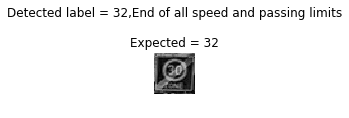

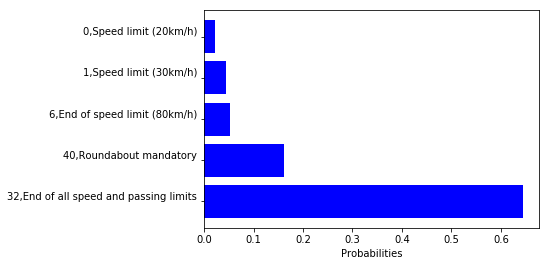

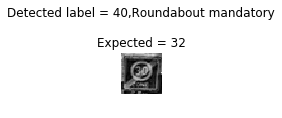

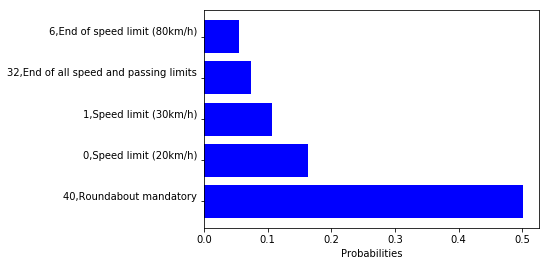

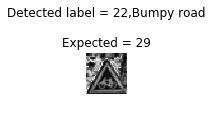

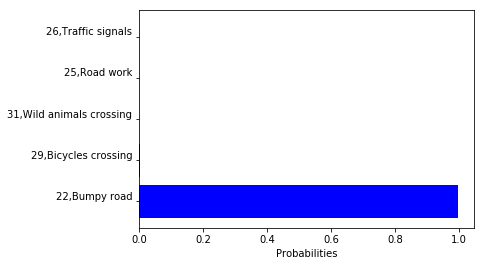

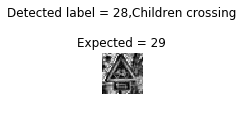

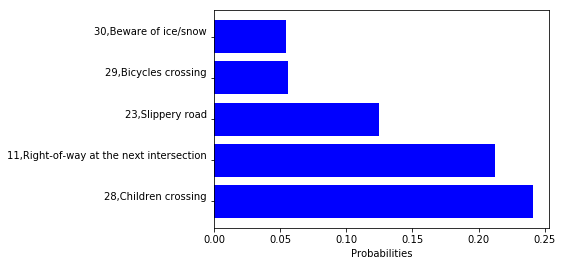

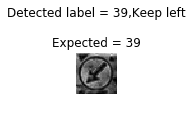

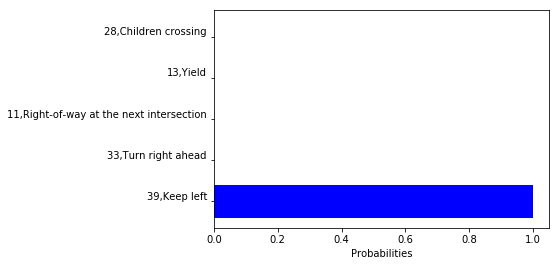

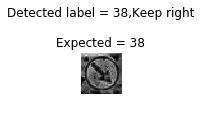

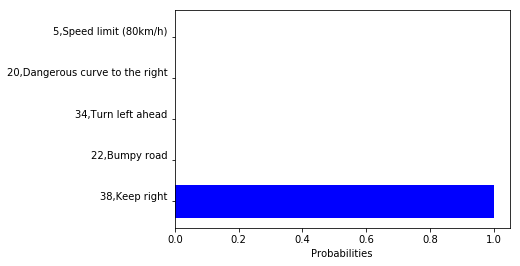

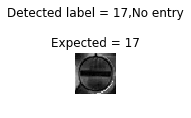

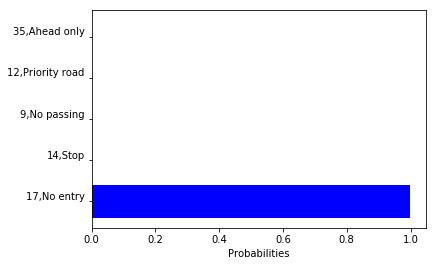

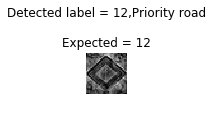

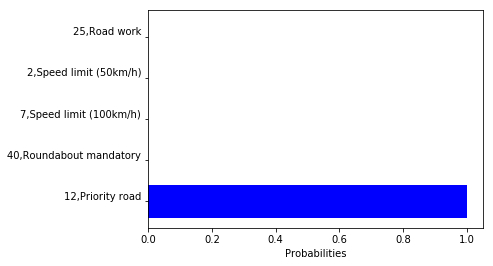

In [27]:
# Plot the bar chart of the top 5 detections for each image

for i in range(len(images)):
    x_pos = np.arange(len(classes[i]))

    sign_labels = []
    for lbl in classes[i]:
        sign_labels.append(linecache.getline("signnames.csv", lbl + 2))

    fig, ax = plt.subplots(figsize=(0.75, 0.75))
    plt.imshow((images[i] * 128. + 128.))
    plt.axis('off')
    plt.title("Detected label = {}\nExpected = {}".format(
        sign_labels[0], expected_signs[i]))
    plt.show()

    plt.barh(x_pos, probabilities[i],  align='center', color='b')
    # add some text for labels, title and axes ticks
    plt.xlabel('Probabilities')
    plt.yticks(x_pos, sign_labels)
    plt.show()

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [33]:
# Visualize your network's feature maps here.
# Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on
# the same block, just extend the plt number for each new feature map
# entry


def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1, plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble
    # accessing the variable from inside a function
    activation = tf_activation.eval(session=sess, feed_dict={x: image_input, keep_prob: 1.0})

    if len(activation.shape) < 4:
        # Currently cannot handle flattened images
        return
    else:
        featuremaps = activation.shape[3]

        plt.figure(plt_num, figsize=(15, 15))
        for featuremap in range(featuremaps):
            # sets the number of feature maps to show on each row and column
            plt.subplot(6, 8, featuremap + 1)
            # displays the feature map number
            plt.title('FeatureMap ' + str(featuremap))
            if activation_min != -1 & activation_max != -1:
                plt.imshow(activation[0, :, :, featuremap], interpolation="nearest",
                           vmin=activation_min, vmax=activation_max, cmap="gray")
            elif activation_max != -1:
                plt.imshow(activation[0, :, :, featuremap],
                           interpolation="nearest", vmax=activation_max, cmap="gray")
            elif activation_min != -1:
                plt.imshow(activation[0, :, :, featuremap],
                           interpolation="nearest", vmin=activation_min, cmap="gray")
            else:
                plt.imshow(activation[0, :, :, featuremap],
                           interpolation="nearest", cmap="gray")

Activation shape = (8, 28, 28, 18)
Activation shape = (8, 14, 14, 18)
Activation shape = (8, 10, 10, 48)


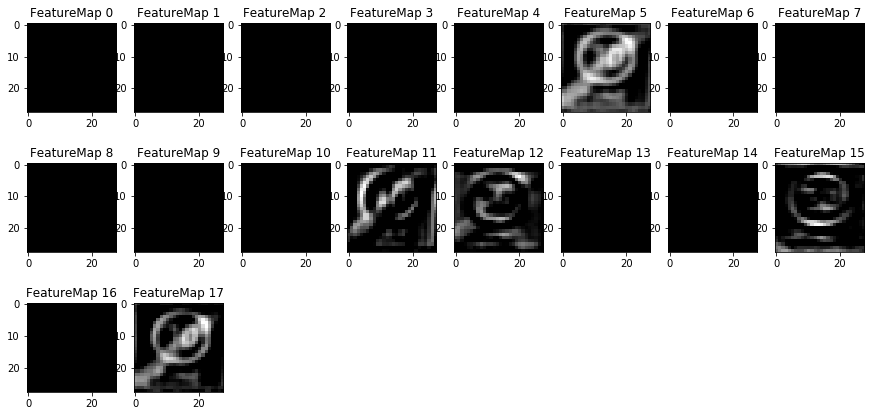

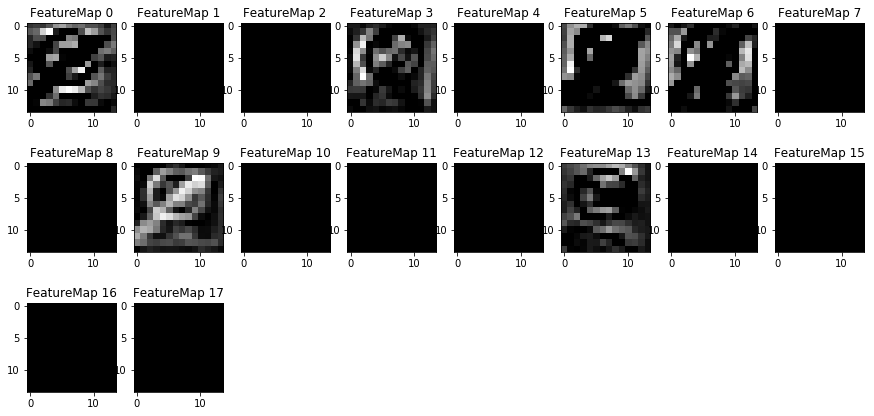

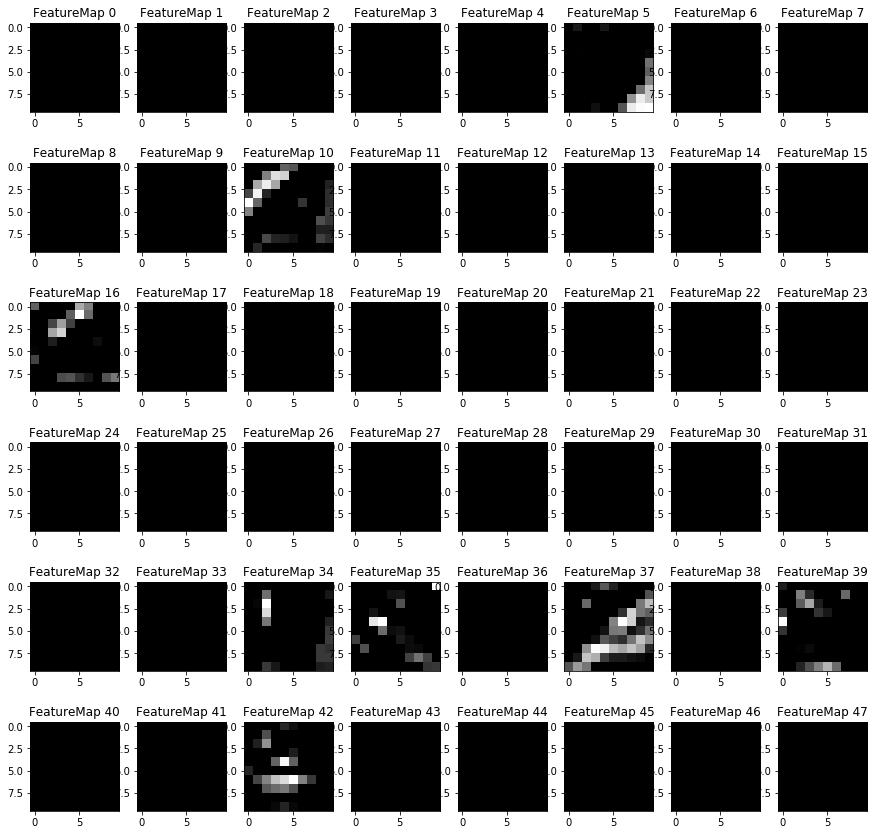

In [36]:
with tf.Session() as sess:
    saver.restore(sess, './traffic_sign')

    op = tf.get_default_graph().get_tensor_by_name("relu_1:0")
    outputFeatureMap(images, op, plt_num=1)

    op = tf.get_default_graph().get_tensor_by_name("relu_1a:0")
    outputFeatureMap(images, op, plt_num=2)

    op = tf.get_default_graph().get_tensor_by_name("relu_2:0")
    outputFeatureMap(images, op, plt_num=3)


### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 